In [41]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("KNN_Project_Data")

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


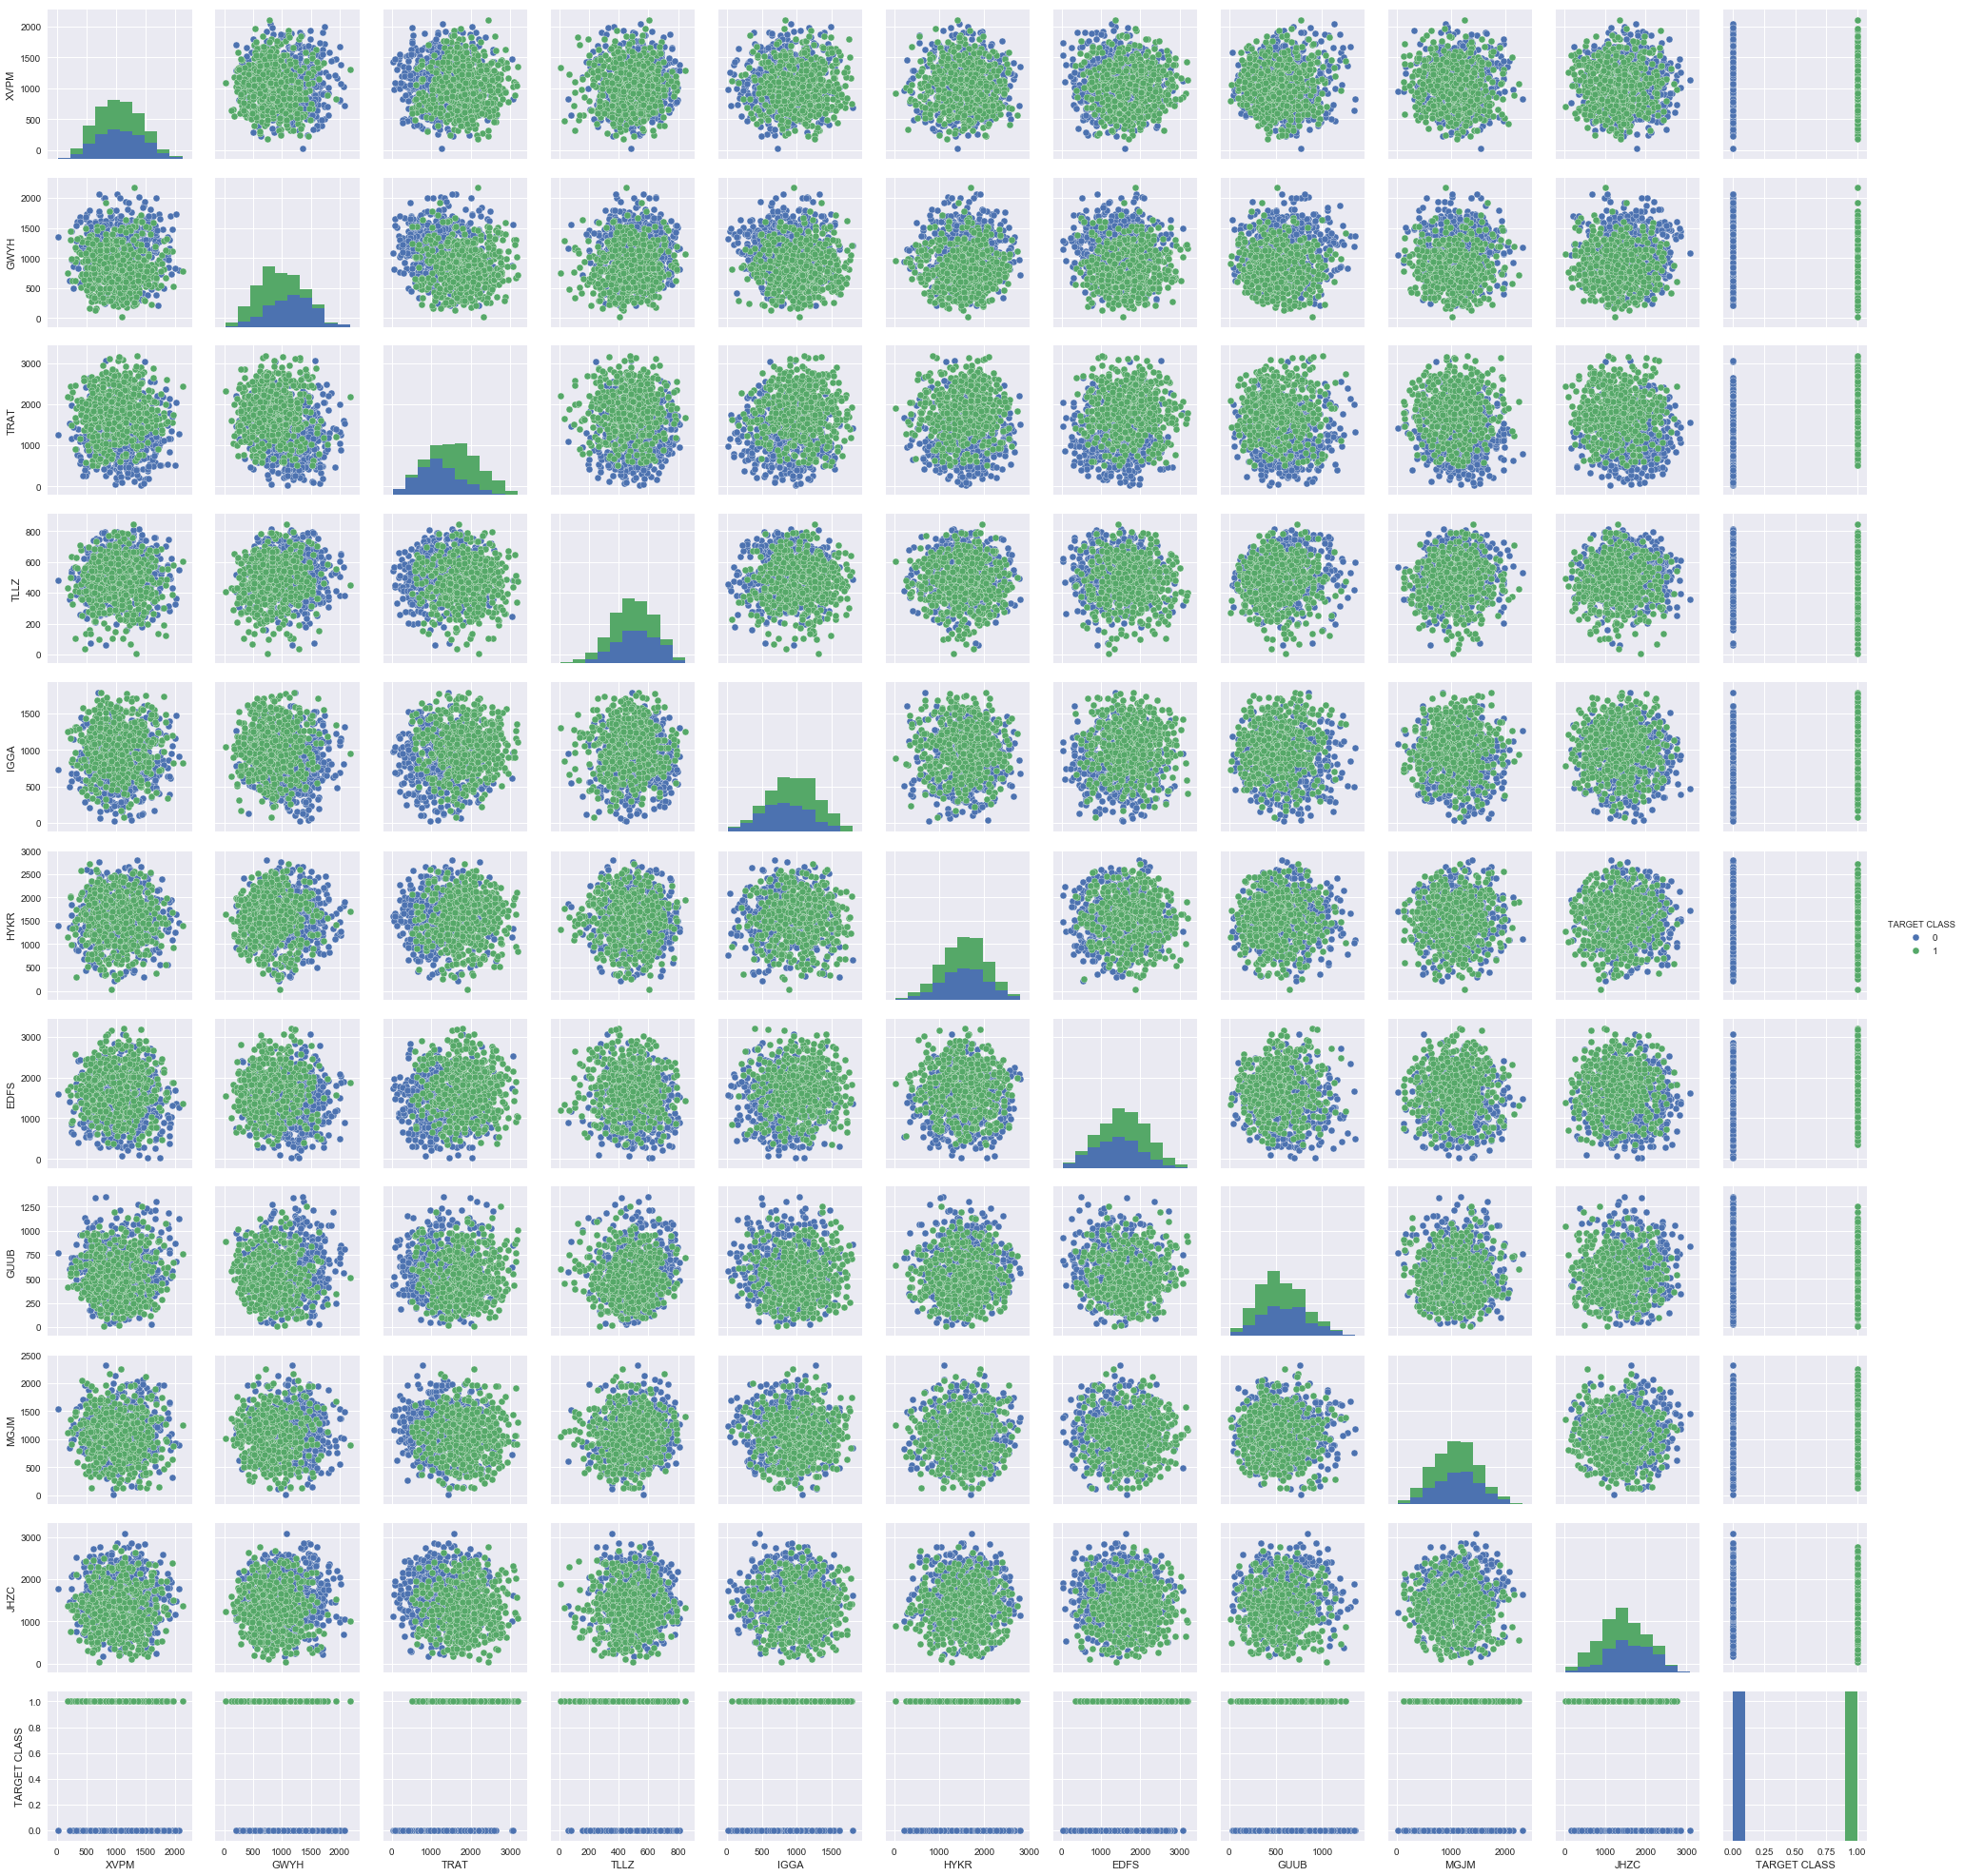

In [8]:
sns.pairplot(df, hue = 'TARGET CLASS')

In [11]:
from sklearn.preprocessing import StandardScaler 

In [12]:
scaler = StandardScaler()

In [19]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))
scal_df =  scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [24]:
df2 = pd.DataFrame(scal_df, columns = df.columns[:-1])

In [25]:
df2.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [26]:
### Train Test Split

In [27]:
from sklearn.cross_validation import train_test_split


In [29]:
X = df2
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.3, random_state=101)

In [30]:
### Apply KNN to predict

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print (confusion_matrix(y_test, predict))

[[109  43]
 [ 41 107]]


In [36]:
print (classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.73      0.72      0.72       152
          1       0.71      0.72      0.72       148

avg / total       0.72      0.72      0.72       300



In [37]:
### lets try to find the better K as preciions is low: use ELBOW method

In [42]:

error_rpt = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    predict_i = knn.predict(X_test)
    
    error_rpt.append(np.mean(predict_i != y_test))
    

In [43]:
error_rpt

[0.28000000000000003,
 0.28999999999999998,
 0.21666666666666667,
 0.22,
 0.20666666666666667,
 0.20999999999999999,
 0.18333333333333332,
 0.19,
 0.19,
 0.17666666666666667,
 0.18333333333333332,
 0.18333333333333332,
 0.18333333333333332,
 0.17999999999999999,
 0.17999999999999999,
 0.17999999999999999,
 0.17000000000000001,
 0.17333333333333334,
 0.17666666666666667,
 0.18333333333333332,
 0.17666666666666667,
 0.18333333333333332,
 0.16666666666666666,
 0.17999999999999999,
 0.16666666666666666,
 0.17000000000000001,
 0.16666666666666666,
 0.17333333333333334,
 0.16666666666666666,
 0.17333333333333334,
 0.16,
 0.16666666666666666,
 0.17333333333333334,
 0.17333333333333334,
 0.17000000000000001,
 0.16666666666666666,
 0.16,
 0.16333333333333333,
 0.16,
 0.17000000000000001,
 0.16666666666666666,
 0.16666666666666666,
 0.16333333333333333,
 0.17333333333333334,
 0.16666666666666666,
 0.16666666666666666,
 0.17000000000000001,
 0.16666666666666666,
 0.17333333333333334]

Text(0.5,1,'Error Rate Vs. K')

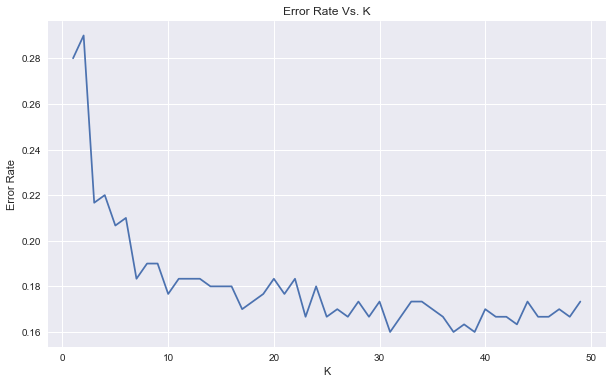

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rpt)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate Vs. K')

In [51]:
### As error rate becomes between 0.16 and 0.18 so lets pick K = 32. 
### retrain your model and evalutae confusion matrix and classification report

In [54]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)



In [55]:
print (confusion_matrix(y_test, pred))

[[124  28]
 [ 22 126]]


In [56]:
print (classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.85      0.82      0.83       152
          1       0.82      0.85      0.83       148

avg / total       0.83      0.83      0.83       300

